# Trabajo 4 

### Kelly Johana Collazo Quiroz 
### Ingenieria biomedica 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [44]:
daclinicos = pd.read_csv('heart_failure_clinical_records.csv', sep=',')

print(df.head())
print(df.describe())

  age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0       55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0                                                                                                      
1        65.0,0,56,0,25,0,305000.0,5.0,130,1,0,207,0                                                                                                      
2       45.0,0,582,1,38,0,319000.0,0.9,140,0,0,244,0                                                                                                      
3        60.0,1,754,1,40,1,328000.0,1.2,126,1,0,90,0                                                                                                      
4        95.0,1,582,0,30,0,461000.0,2.0,132,1,0,50,1                                                                                                      
       age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction

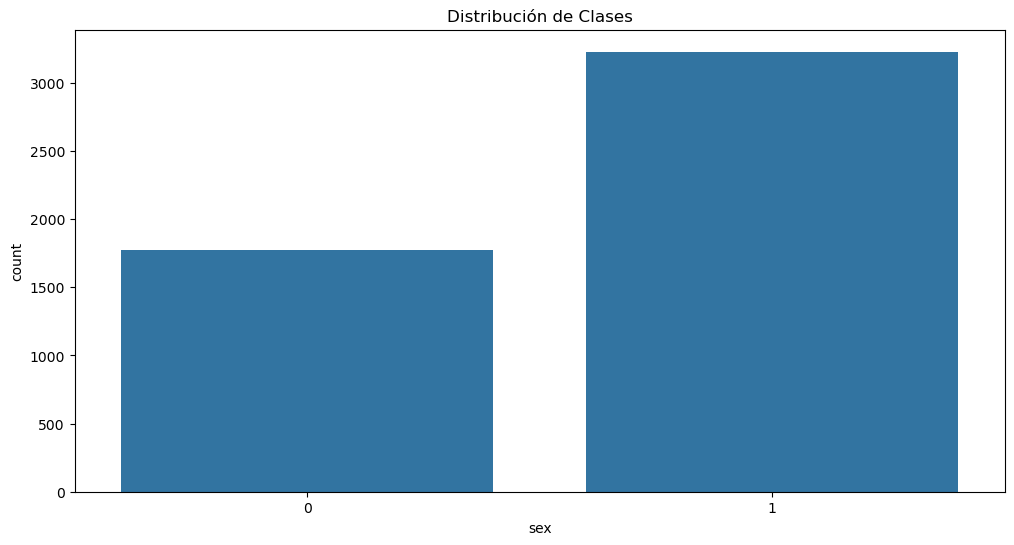

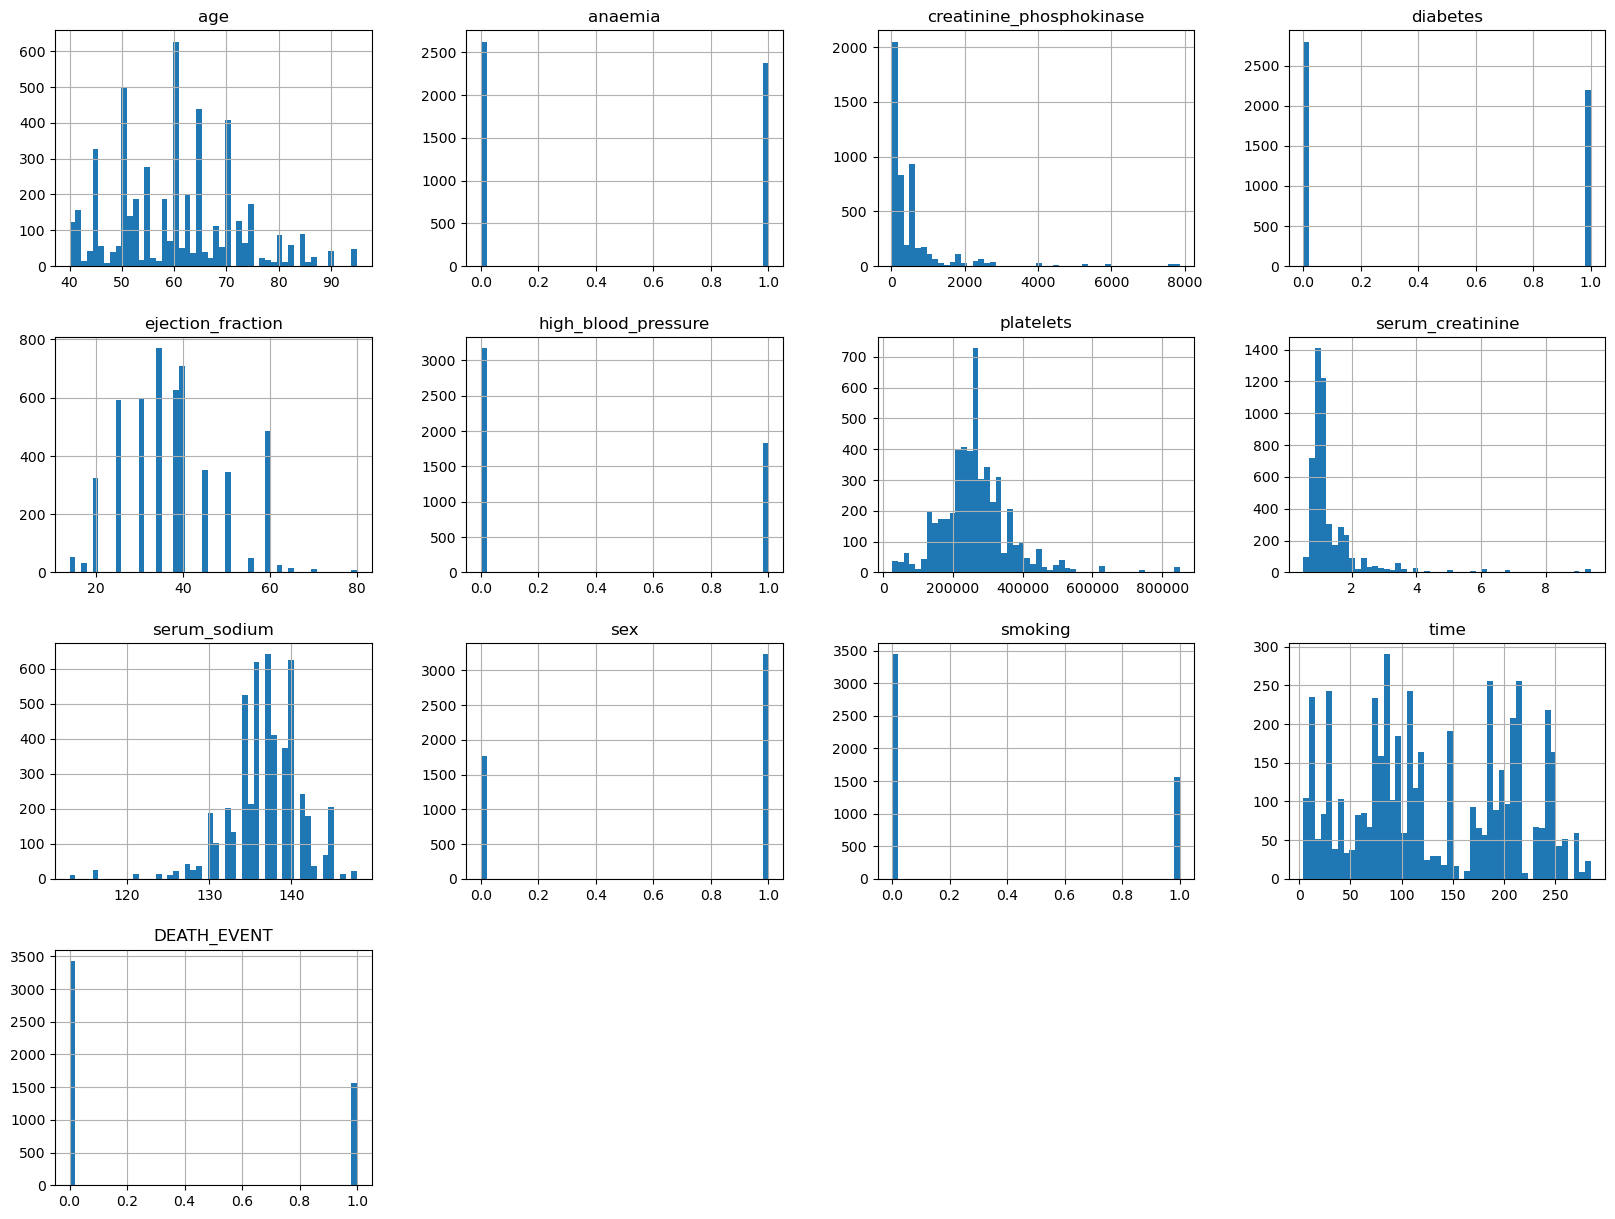

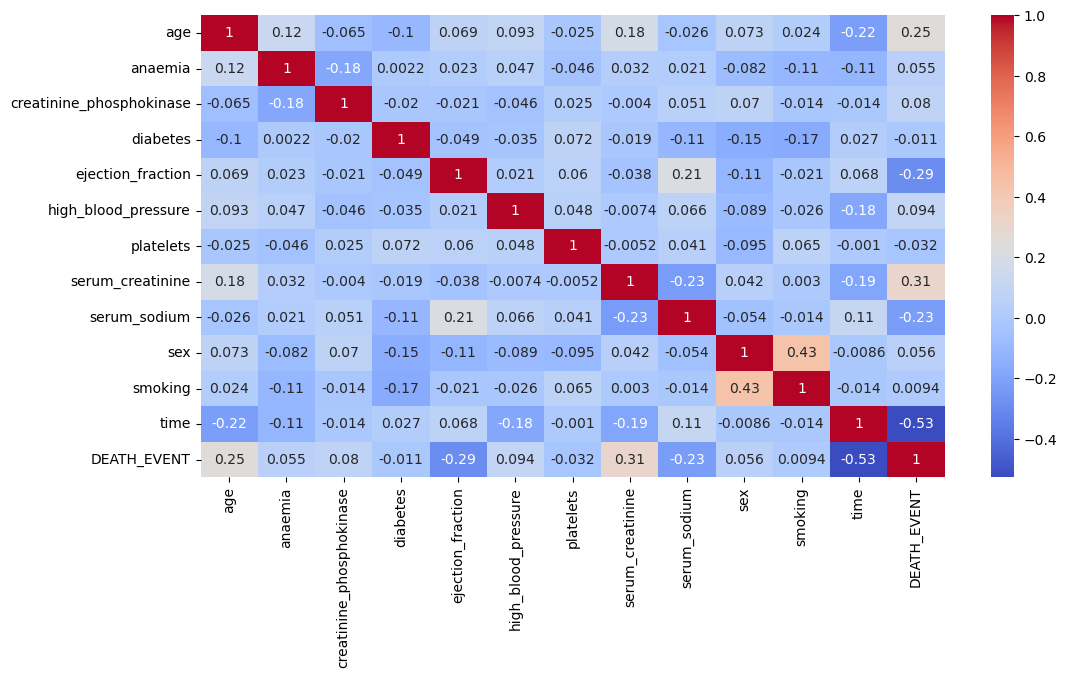

In [45]:
# Visualizar la distribución de las clases
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=daclinicos)
plt.title('Distribución de Clases')
plt.show()

# Visualizar la distribución de las variables numéricas
daclinicos.hist(bins=50, figsize=(20, 15))
plt.show()

# Visualizar la correlación entre las variables
plt.figure(figsize=(12, 6))
corr_matrix = daclinicos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [46]:

daclinicos.dropna(inplace=True)
daclinicos.drop_duplicates(inplace=True)

print(daclinicos.info())
print(daclinicos.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 4972
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1320 non-null   float64
 1   anaemia                   1320 non-null   int64  
 2   creatinine_phosphokinase  1320 non-null   int64  
 3   diabetes                  1320 non-null   int64  
 4   ejection_fraction         1320 non-null   int64  
 5   high_blood_pressure       1320 non-null   int64  
 6   platelets                 1320 non-null   float64
 7   serum_creatinine          1320 non-null   float64
 8   serum_sodium              1320 non-null   int64  
 9   sex                       1320 non-null   int64  
 10  smoking                   1320 non-null   int64  
 11  time                      1320 non-null   int64  
 12  DEATH_EVENT               1320 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 144.4 KB
None
age            

In [52]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = daclinicos.drop('sex', axis=1)
y = daclinicos['sex']


In [49]:
# Reducir el tamaño del dataset para pruebas
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Support Vector Machine:
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.69      0.77      0.73        26

    accuracy                           0.62        40
   macro avg       0.57      0.56      0.56        40
weighted avg       0.61      0.62      0.61        40

Random Forest:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.76      0.85      0.80        26

    accuracy                           0.73        40
   macro avg       0.70      0.67      0.68        40
weighted avg       0.72      0.72      0.72        40



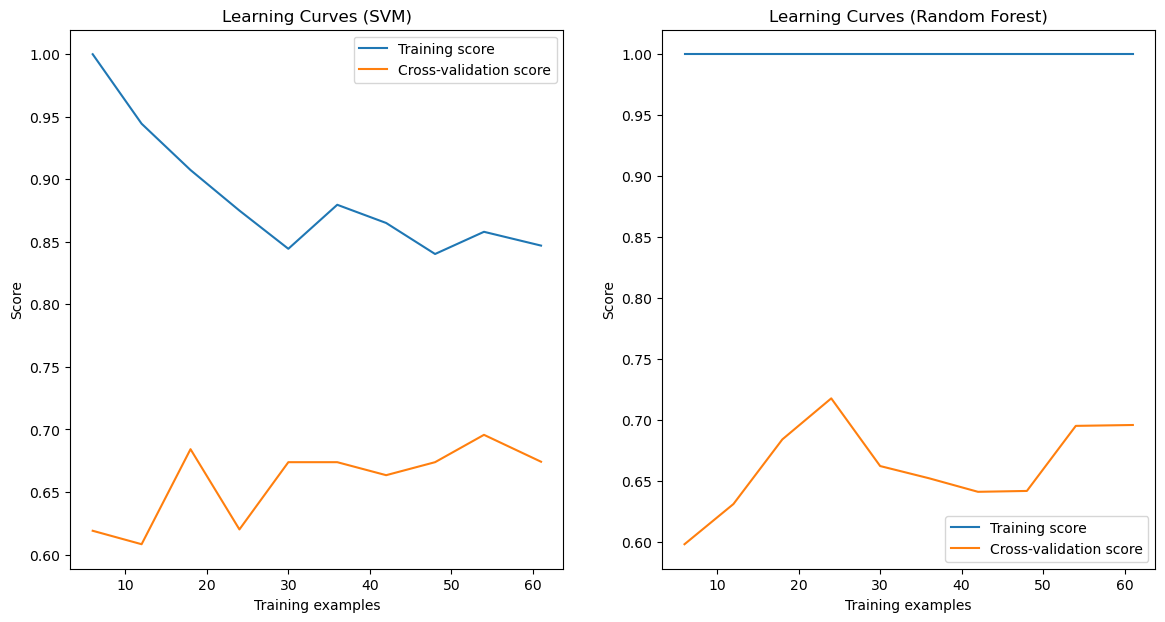

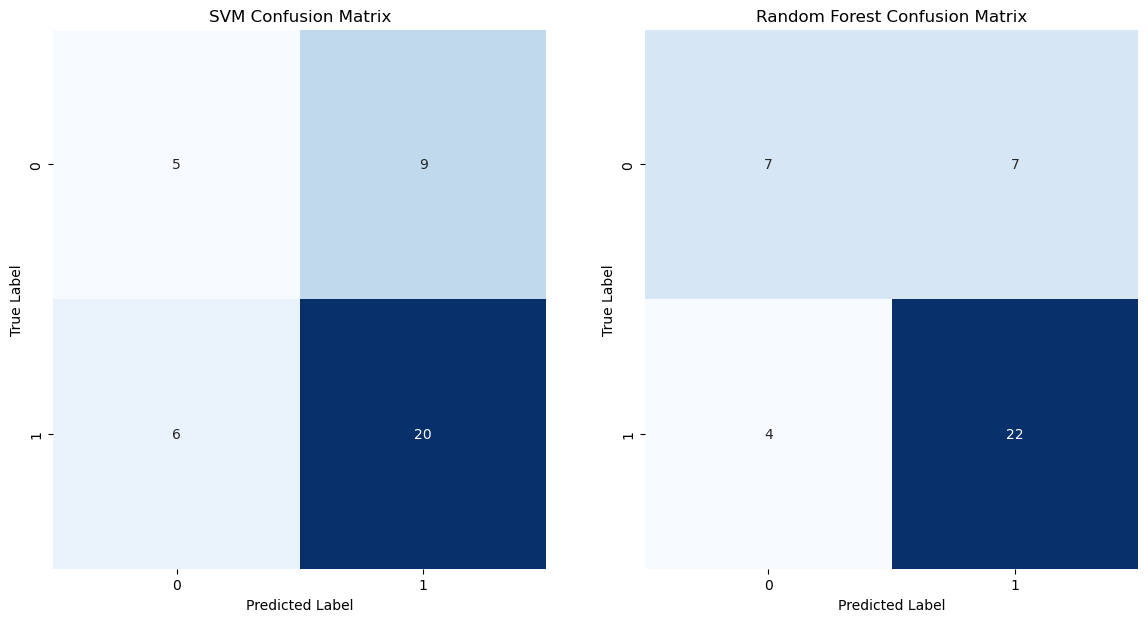

In [51]:
# Construir un pipeline para el modelo SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Definir la grilla de hiperparámetros para GridSearchCV
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01, 0.001]
}

# Realizar búsqueda de hiperparámetros para SVM
svm_grid = GridSearchCV(svm_pipe, param_grid_svm, cv=3, error_score='raise')
try:
    svm_grid.fit(X_train, y_train)
except ValueError as e:
    print(f"Error al ajustar SVM: {e}")

# Obtener los mejores hiperparámetros y el mejor modelo SVM
if hasattr(svm_grid, 'best_params_'):
    best_params_svm = svm_grid.best_params_
    best_model_svm = svm_grid.best_estimator_

    # Construir un pipeline para el modelo Random Forest
    rf_pipe = Pipeline([
        ('rf', RandomForestClassifier())
    ])

    # Definir la grilla de hiperparámetros para GridSearchCV
    param_grid_rf = {
        'rf__n_estimators': [100, 200],
        'rf__max_depth': [10, 20]
    }

    # Realizar búsqueda de hiperparámetros para Random Forest
    rf_grid = GridSearchCV(rf_pipe, param_grid_rf, cv=3, error_score='raise')
    rf_grid.fit(X_train, y_train)

    # Obtener los mejores hiperparámetros y el mejor modelo Random Forest
    best_params_rf = rf_grid.best_params_
    best_model_rf = rf_grid.best_estimator_

    # Evaluar los modelos en el conjunto de prueba
    y_pred_svm = best_model_svm.predict(X_test)
    y_pred_rf = best_model_rf.predict(X_test)

    # Imprimir métricas de evaluación
    print("Support Vector Machine:")
    print(classification_report(y_test, y_pred_svm))
    print("Random Forest:")
    print(classification_report(y_test, y_pred_rf))

    # Realizar curvas de aprendizaje
    train_sizes_svm, train_scores_svm, valid_scores_svm = learning_curve(best_model_svm, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)
    train_sizes_rf, train_scores_rf, valid_scores_rf = learning_curve(best_model_rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)

    # Visualizar las curvas de aprendizaje
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes_svm, np.mean(train_scores_svm, axis=1), label='Training score')
    plt.plot(train_sizes_svm, np.mean(valid_scores_svm, axis=1), label='Cross-validation score')
    plt.title('Learning Curves (SVM)')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training score')
    plt.plot(train_sizes_rf, np.mean(valid_scores_rf, axis=1), label='Cross-validation score')
    plt.title('Learning Curves (Random Forest)')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

    # Comparar el desempeño de los modelos
    # Visualizar la matriz de confusión
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("SVM Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Random Forest Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    plt.show()
else:
    print("Error al encontrar los mejores hiperparámetros para SVM")